# [Исследование методов для подбора ширины столбца  гистограммы](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width)

**Цель:** 
1. Исследовать результат работы различных правил для подбора ширины столбца гистограммы для различных типов распределений
2. Сравнить применение лучших встроенных правил для расчета с методом Симадзаки-Шиномото
3. Сравнить гистограммы, построенные с использованием встроенных методов определения столбцов и "ручным" расчетом кол-ва столбцов

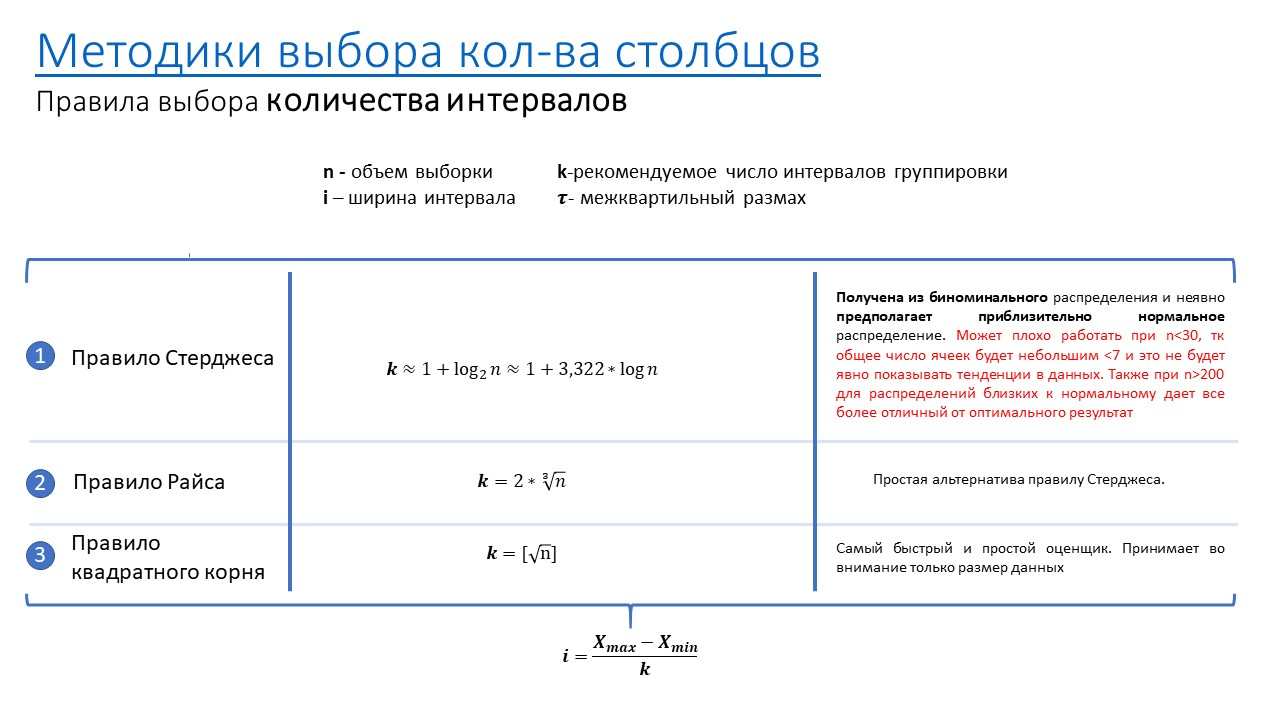

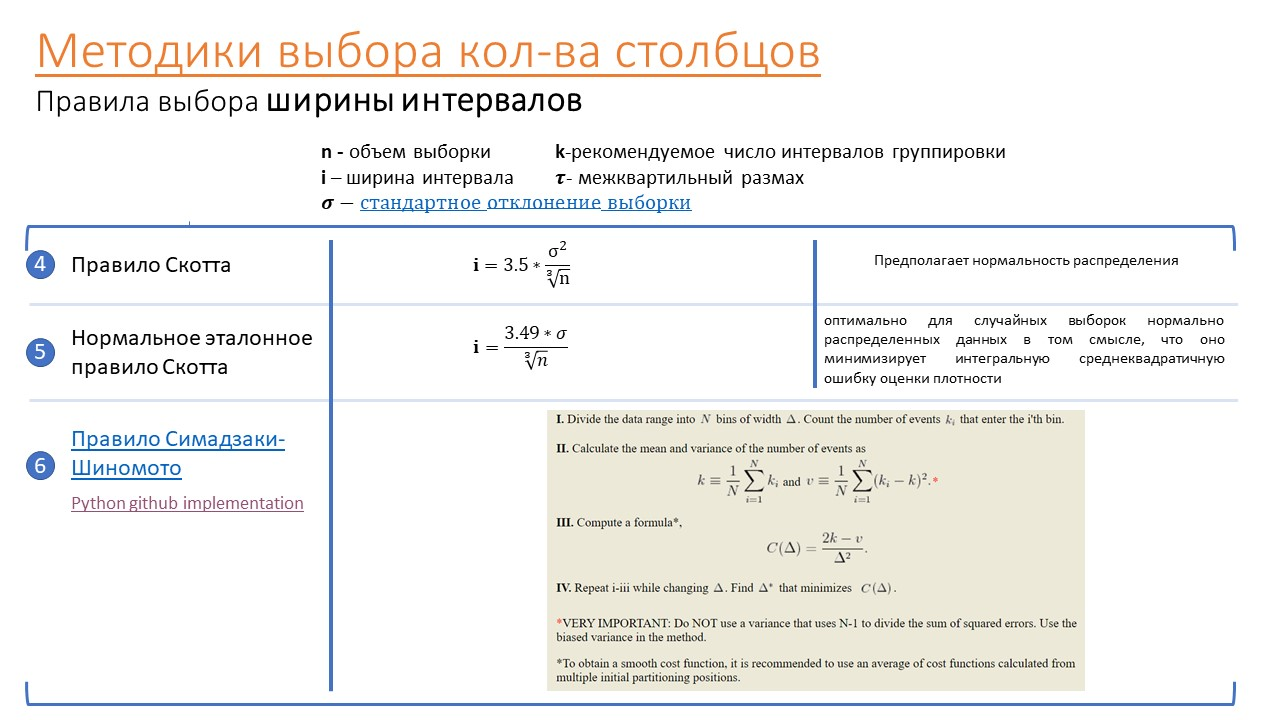

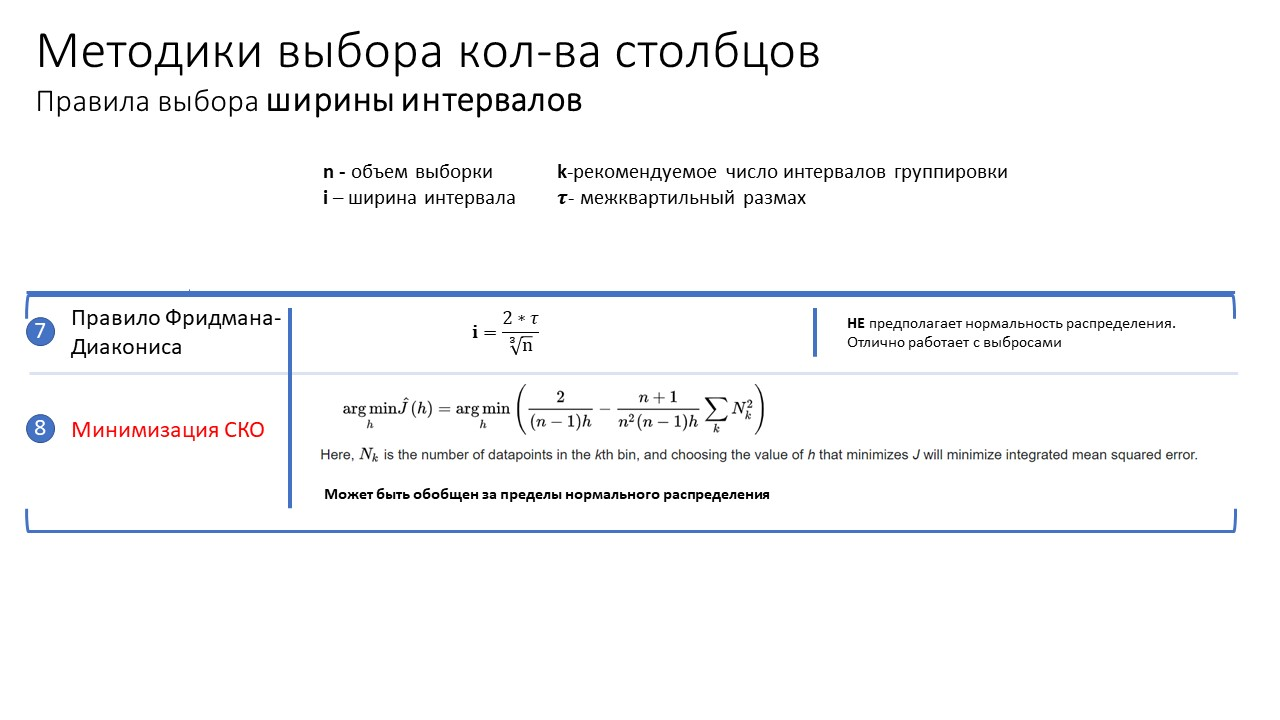

# Загрузка библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Генерация данных

In [2]:
# Сгенерирую тестовые данные из различных распределений для проверки правил расчета ширины/количества столбцов
a = np.random.normal(loc = -1, scale = 2, size = 1000)
b = np.random.random(size=1000)
c = np.random.lognormal(mean=0.0, sigma=1.0, size=1000)
d = np.random.laplace(loc=0.0, scale=1.0, size=1000)
e = np.random.gamma(2., 2., 1000)

distribution_dict = {'normal':a,'random':b,'lognormal':c,'laplace':d,'gamma':e}

## 1. Проверка правил подбора ширины столбца. Расчет на основе параметров стандартных библиотек.

<p> В функции для построения гистограммы <a href="https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.hist.html">matplotlib.pyplot.hist</a> по умолчанию используется <strong>кол-во столбцов равное 10</strong> </p>
<p> В параметре <strong>bins</strong> этой функции можно указать как метод расчета ширины столбцов, так и их количество или границы </p> 
<p> <strong>Координаты границ</strong> можно получить при помощи функции
<a href="https://pyprog.pro/statistics_functions/histogram_bin_edges.html">numpy.histogram_bin_edges</a></p>

#### Методы расчета ширины столбца гистограммы, используемые в matplotlib.pyplot.hist и numpy.histogram_bin_edges:

1. <strong>'auto'</strong> - максимальные значения 'sturges' и 'fd'. Обеспечивает наилучшую производительность;
2. <strong>'fd'</strong> - метод оценки Фридмана-Диакониса, который учитывает размер данных и их изменчивость. Устойчив к выбросам и считается наиболее надежным;
3. <strong>'doane'</strong> - улучшенная версия 'sturges', которая лучше всего подходит для данных с ненормальным распределением значений;
4. <strong>'scott'</strong> - метод, который учитывает изменчивость и размер данных, но является менее надежным;
5. <strong>'stone'</strong> - основанн на оценке перекрестной валидации leave-one-out интегрированная квадратная ошибка. Можно рассматривать как обобщение о правиле Скотта.
5. <strong>'rice'</strong> - учитывает только размер данных и обычно переоценивает количество необходимых ячеек;
6. <strong>'sturges'</strong> - R-метод, который учитывает только размер данных. Оптимален только для данных с гаусовым распределением значений. Для больших негаусовых данных недооценивается необходимое количество ячеек;
7. <strong>'sqrt'</strong> - метод на основе квадратного корня от размера данных, самый быстрый и простой метод, но может подойти не для всех данных.

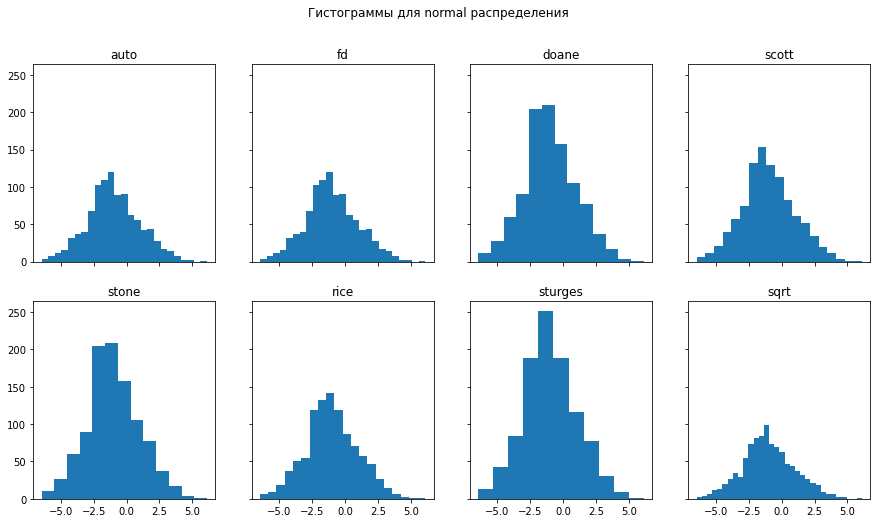

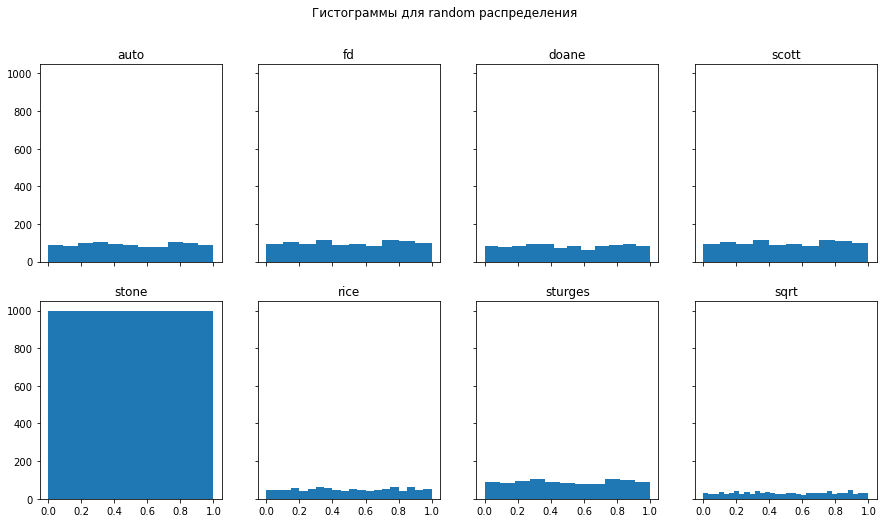

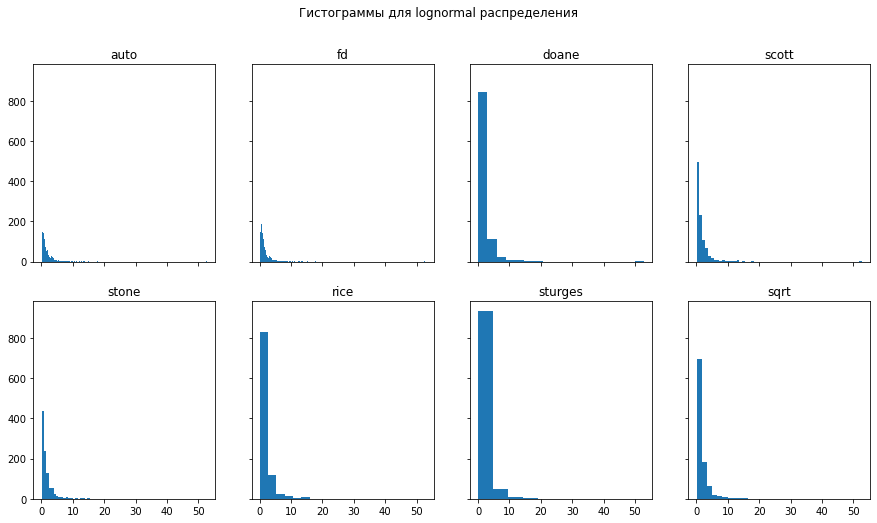

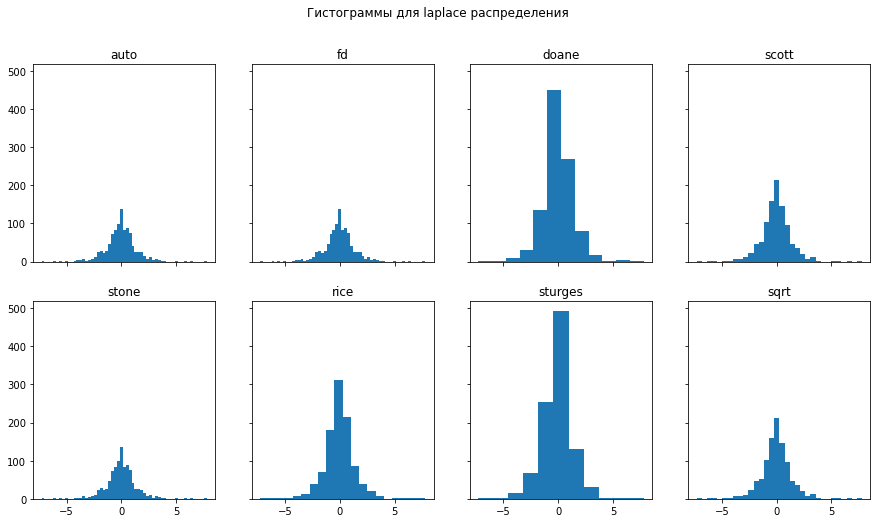

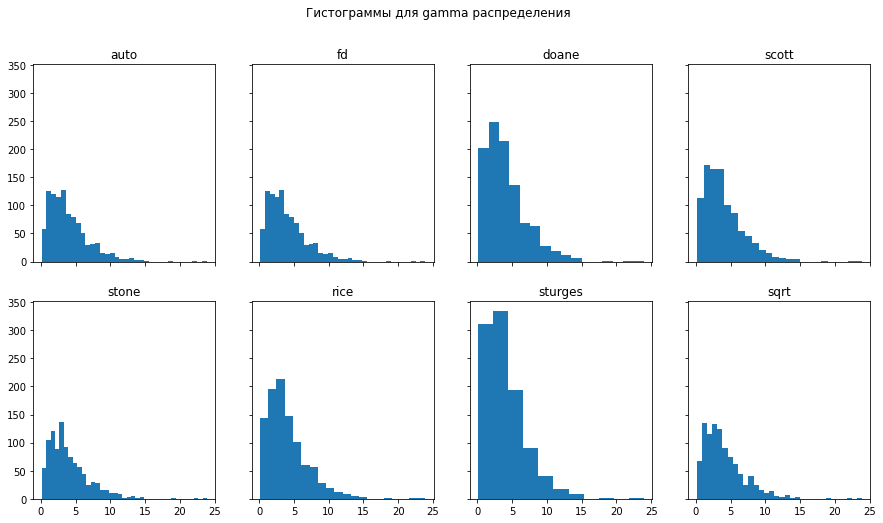

In [3]:
def plotting_hist(data,distridution_type = None):
    """Функция для построения гистограмм со всевозможными типами расчета ширины столбца гистограммы
        
       Параметры
       _ _ _ _ _ _
       
       data: массив данных int или float для которого предполагается строить гистограмму
       distridution_type: тип распределения для которого стрятся гистограммы. По умолчанию равен None
       
       Возвращает
       _ _ _ _ _ _
       Отображение гистограмм распределения величины
    """
    
    hist_edge_rules = [ 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges','sqrt']
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharex=True, sharey=True)
    fig.set_size_inches(15,8)
    axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
    fig.suptitle('Гистограммы для {} распределения'.format(distridution_type))
    for i, j in enumerate(axs):
        j.hist(data, bins = hist_edge_rules[i])
        j.set_title(hist_edge_rules[i])
    plt.show()
    
def plotting_hist_with_bins_edge_calculus(data,distridution_type = None):
    """Функция для построения гистограмм со всевозможными типами расчета ширины столбца гистограммы.
       Отличается от plotting_hist только применением np.histogram_bin_edges для расчета координат границ столбцов гистограммы
    
       Параметры
       _ _ _ _ _ _
       
       data: массив данных int или float для которого предполагается строить гистограмму
       distridution_type: тип распределения для которого стрятся гистограммы. По умолчанию равен None
       
       Возвращает
       _ _ _ _ _ _
       Отображение гистограмм распределения величины
    """
    
    hist_edge_rules = [ 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges','sqrt']
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharex=True, sharey=True)
    fig.set_size_inches(15,8)
    # plt.subplots_adjust(top =0.75) #creating space for slider and button widgets
    axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
    fig.suptitle('Гистограммы для {} распределения'.format(distridution_type))
    for i, j in enumerate(axs):
        bins_boundaries = np.histogram_bin_edges(data, bins=hist_edge_rules[i])
        j.hist(data, bins = bins_boundaries)
        j.set_title(hist_edge_rules[i])
    plt.show()

# Применение функции    
for key, values in distribution_dict.items():
    plotting_hist(values, key)

**Для <font color='orange'>нормального</font> распределения** типы полученных распределений можно разделить на 2 болшие группы в зависимости от метода:
- 'auto', 'fd', 'rice', 'sqrt'
- 'doane','stone', 'sturges' более вытянутые. Логично, что они похожи, тк они подходят для нормального распределения. Именно гистограммы, построенные этим методом лучше отражают симметричность, что является характеристикой нормального распределения.
- результат по правилу 'scott' между 1й и 2й группой
<p><strong>Методы 2й группы дают кол-во столбцов оптимальнее. Визуальная оценка выделяет правило Стерджеса, как лучшее.</strong></p>

**Для <font color='green'>случайного</font> распределения** типы полученных распределений можно разделить на 2 болшие группы в зависимости от метода:
- 'auto', 'fd', 'doane', 'scott', 'sturges'
- 'rice','stone', 'sqrt' . имеет большее кол-во столбцов. 
<p><strong>Визуальная оценка выделяет правило квадратного корня, как лучшее для определения оптимального кол-ва столбцов гистограммы.</strong></p> Метод Райса дал схожий с sqrt результат, что логично, тк они оба учитывают только размер данных.

**Для <font color='blue'>логнормального</font> распределения** типы полученных распределений можно разделить на 2 болшие группы в зависимости от метода:
- 'auto', 'fd', 'stone' имеют большее кол-во столбцов. 
- 'doane','sturges', 'rice' 
- 'sqrt' между 1й и 2й группой
<p><strong>Визуальная оценка выделяет правила 'auto' и 'fd', как лучшие для определения оптимального кол-ва столбцов гистограммы. Визуально сложно определить между ними разницу</strong></p> Методы Скотта и квадратного  дали сравнимо неплохие результаты.

**Для распределения <font color='gray'>Лапласа</font>** типы полученных распределений можно разделить на 2 болшие группы в зависимости от метода:
- 'auto', 'fd', 'stone','scott', 'sqrt' имеют большее кол-во столбцов. 
- 'doane','sturges', 'rice'
<p><strong>Райс лучше всего отражает симметричность.Остальные методы 1й группы также отражают реальное распределение, но визуально выглядят менее симметричными</strong></p>

**Для <font color='purple'>гамма</font> распределения** типы полученных распределений можно разделить на 2 болшие группы в зависимости от метода:
- 'auto', 'fd', 'stone','scott', 'sqrt', 'rice' имеют большее кол-во столбцов. 
- 'doane','sturges'
<p><strong>'rice', 'auto', 'fd' лучше всего отражают реальное распределение.</strong></p>

### **Выводы:**
1. Методы **'rice' и 'sqrt'** неплохо отражает основные тенденции **для всех типов распределений**. Лучше всего подходят для данных из случайного распределения
2. **Правило Стерджеса** оказалось лучшим для определения оптимального кол-ва столбцов **для <font color='orange'>нормального</font> распределения**
3. **Для ненормальных и не случайных распределений** можно использовать **'fd' или 'auto'**. Однако для распределения Лапласа лучше всего подходит метод Райса

## 2. Сравнение с [методом Симадзаки-Шиномото](https://www.neuralengine.org/res/histogram.html)
[Имплементация](https://gist.github.com/salotz/0158a99a75078b47538452111ec0faa2)

Сравнение данного метода со встроенными методами, используемыми для расчета оптимального кол-ва столбцов

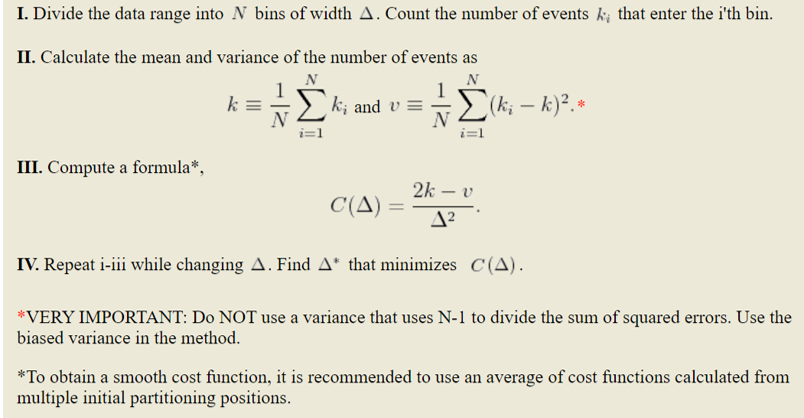

In [4]:
def shimazaki_shinimoto_binning(x, min_bins, max_bins):

    """The Shimazaki-Shinimoto histogram binning algorithm for choosing an
    optimal constant number of bins.
    
    Parameters
    ----------

    x : array of int or float
      The data you want to bin

    min_bins : int
        The minimum number of bins to consider for optimization. Must
        be at least 1.

    max_bins : int
        The maximum number of bins to consider for optimization.

    Returns
    -------
    optimal_bin_size : float
        The optimal bin size calculated

    bin_edges : array of float
        The bin edges for the data using the optimal bin size
    """

    import numpy as np
    assert min_bins > 1, "must be more than 1 bin"
    x_max = np.max(x)
    x_min = np.min(x)
    # The minimum and maximum number of bins will determine the number
    # of trials in between them. This will go into the construction of
    # the cost function to determine the optimal bin size
    trials_num_bins = np.arange(min_bins, max_bins)
    num_trials = len(trials_num_bins)
    # compute the bin size for each trial based on the min and max of
    # the data
    trials_bin_sizes = (x_max - x_min) / trials_num_bins
    # then for each trial we will have a cost value associated with it
    cost_vector = []
    # Computation of the cost values for each bin size trial
    for trial_idx, num_bins in enumerate(trials_num_bins):
#         print(trials_num_bins,trial_idx, num_bins)
        num_edges = num_bins + 1
        # bin edges are linearly spaced for this range
        edges = np.linspace(x_min, x_max, num_edges)
        # count number of events in bins
        trial_hist, _ = np.histogram(x, bins=edges)
        # mean of event count
        mean_count = np.mean(trial_hist)
        # variance of event count
        var_count = sum((trial_hist - mean_count)**2) / num_bins
        # compute the cost for this trial
        cost = (2 * mean_count - var_count) /\
               (trials_bin_sizes[trial_idx] ** 2)
        cost_vector.append(cost)
    # Optimal Bin Size Selection
    # just find the minimal cost
    min_idx = np.argmin(cost_vector)
    min_cost = cost_vector[min_idx]
    # then choose the number of bins associated with that
    optimal_bin_size = trials_bin_sizes[min_idx]
    optimal_num_bins = trials_num_bins[min_idx]
    edges = np.arange(x_min, x_max, trials_num_bins[min_idx]+1)
#     return optimal_bin_size, edges,optimal_num_bins
    return optimal_num_bins

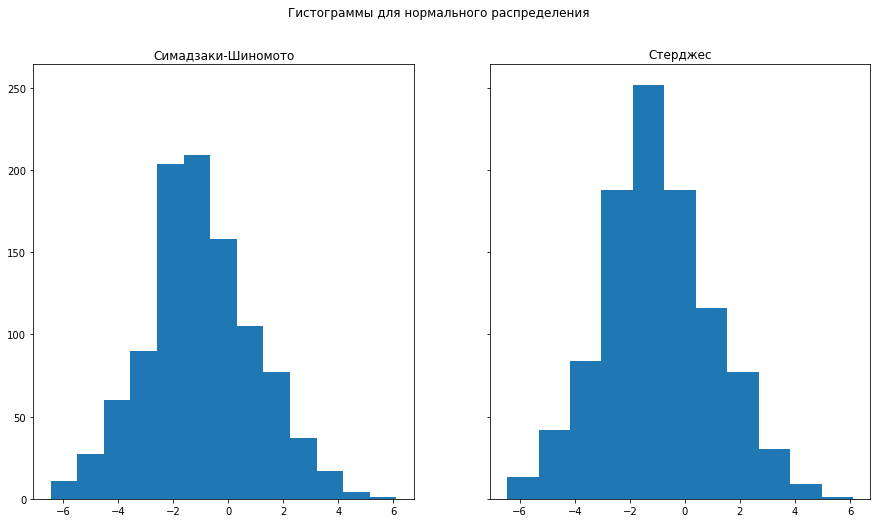

In [5]:
def plotting_two_hist(data, bin_size_rules,distribution_type):
    """Строит 2 гистограммы для одной выбирает кол-во столбцов в соответствии с правилом Симадзаки-Шиномото, 
                            для другой рассчитывает кол-во столбцов в зависимости от выбранного библиотечного типа расчета
                            
       Параметры
       _ _ _ _ _ _
       
       data:              array
                          массив данных int или float для которого предполагается строить гистограмму
                       
       bin_size_rules:    str
                          название стандартного метода расчета в соответствии со словарем
                       
       distribution_type: str
                          название типа распределения"""
    
    bin_size_rules_dic = {'Стерджес':'sturges',
                          'Авто':'auto',
                          'Фридман-Диаконис': 'fd', 
                          'DONE':'doane', 
                          'Скотт':'scott', 
                          'STONE':'stone', 
                          'Райс':'rice',
                          'SQRT':'sqrt'}
    fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    fig.set_size_inches(15,8)
    fig.suptitle('Гистограммы для {} распределения'.format(distribution_type))
    # Расчет оптимального кол-ва столбцов по правилу Симадзаки-Шиномото
    optimal_num_bins = shimazaki_shinimoto_binning(data, 5, 100)
    ax1.hist(data,bins=optimal_num_bins)
    ax1.set_title('Симадзаки-Шиномото')
    ax2.hist(data,bins=bin_size_rules_dic[bin_size_rules])
    ax2.set_title(bin_size_rules)
    plt.show
    
plotting_two_hist(a,'Стерджес', 'нормального')

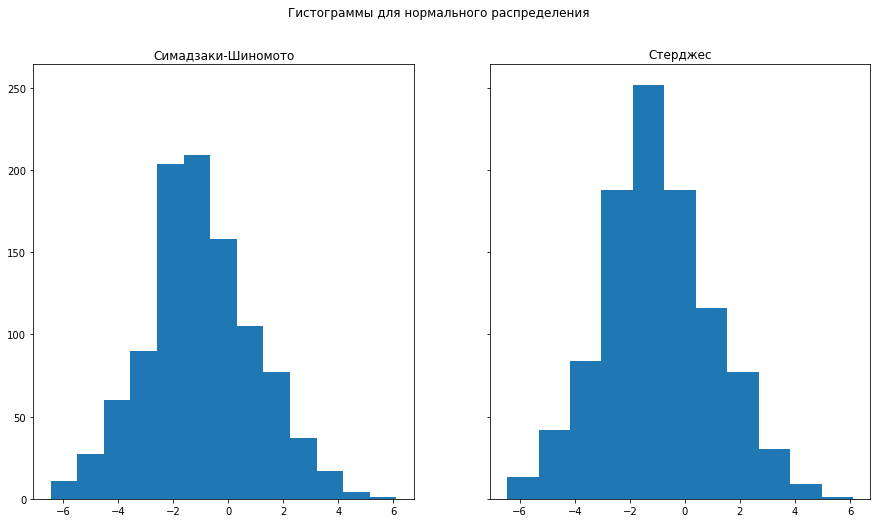

In [6]:
plotting_two_hist(a,'Стерджес', 'нормального')

**Вывод:** данный метод для нормального распределения хуже отражает симметричность

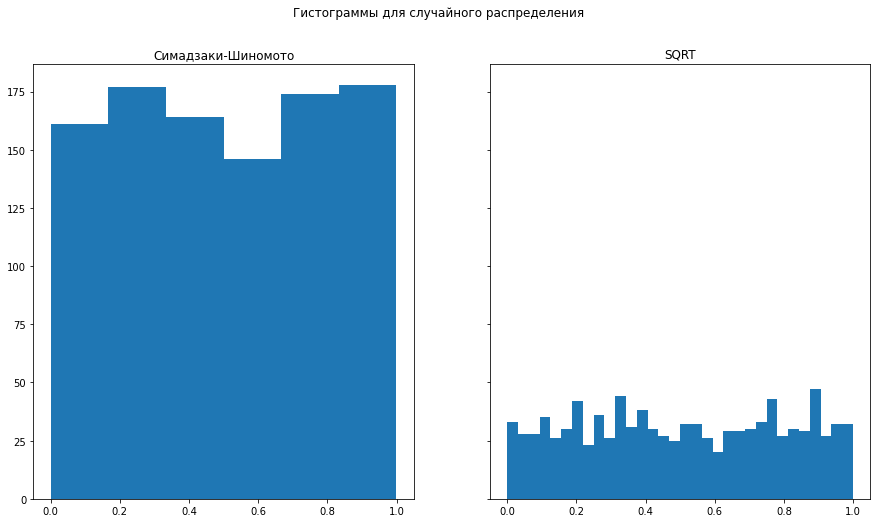

In [7]:
plotting_two_hist(b,'SQRT', 'случайного')

**Вывод:** данный метод для случайного распределения <font color='red'>плохо</font> отражает основные тенденции.

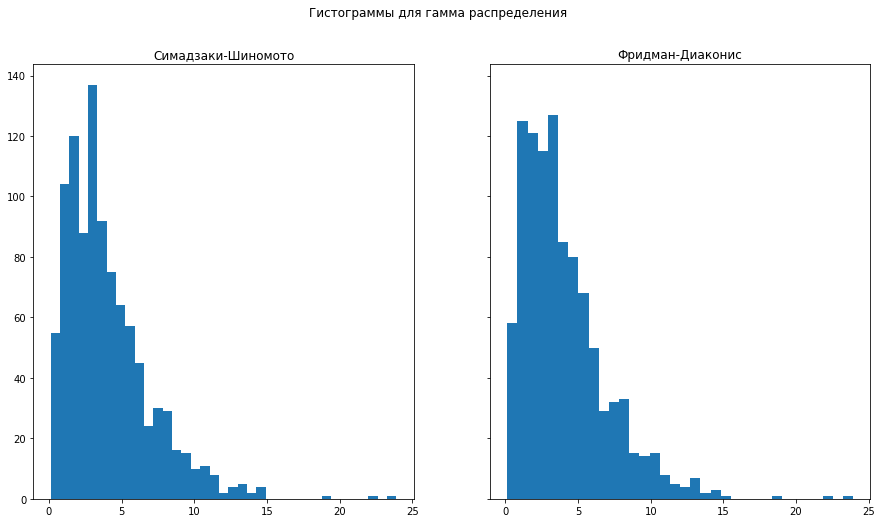

In [8]:
plotting_two_hist(e,'Фридман-Диаконис', 'гамма')

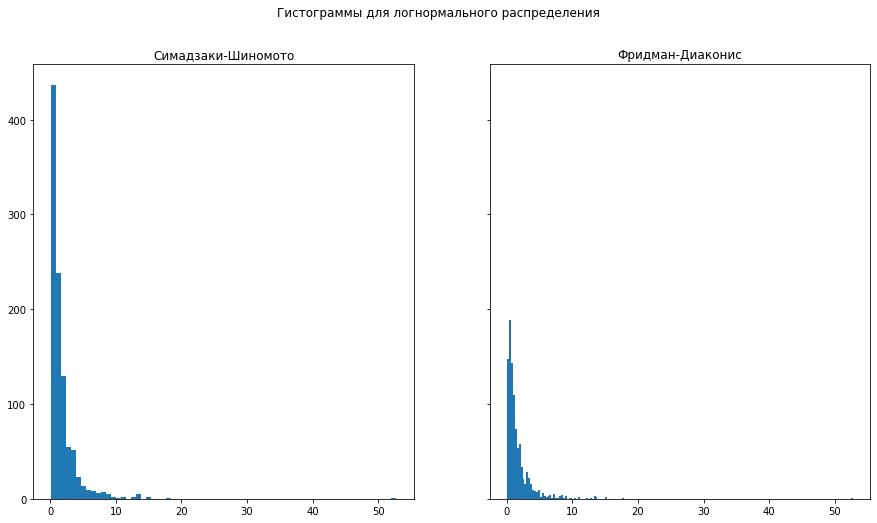

In [9]:
plotting_two_hist(c,'Фридман-Диаконис', 'логнормального')

**Вывод:** данный метод для гамма и логнормального распределения отлично отражает основные тенденции, но Фридман-Диаконис справляется с этой задачей лучше

### Данный метод лучше применять для не нормальных, не случайных распределений

# 3. Самостоятельный расчет ширины столбца vs встроенный

**Цель:** проверить совпадают ли гистограммы, построенныем с использованием встроенных и расчетных методов определения оптимального кол-ва столбцов

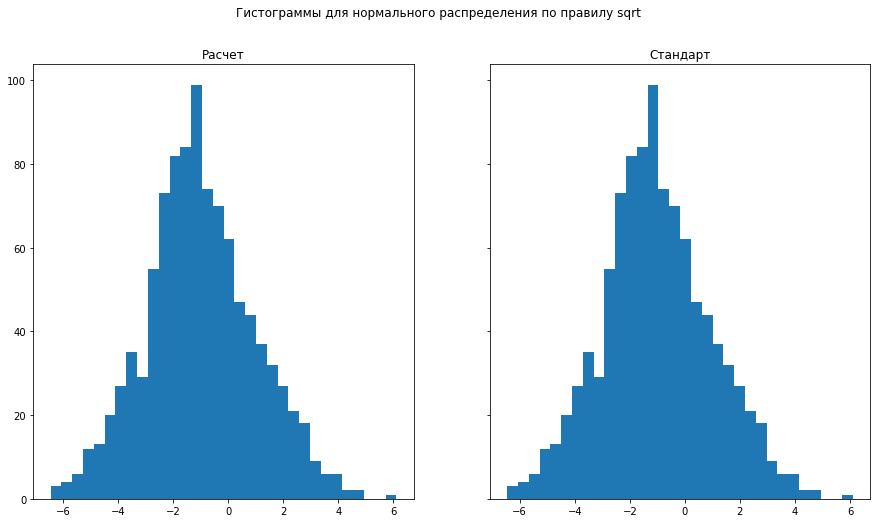

In [12]:
#Функции для расчета кол-ва столбцов
def sqrt_rules(data):
    """Рассчитывает кол-во столбцов по правилу квадратного корня
    
       Параметры
       _ _ _ _ _ _
       
       data:              array
                          массив данных int или float для которого предполагается строить гистограмму"""
    import math
    return math.ceil(pow(len(data),0.5))

def rice_rule(data):
    """Рассчитывает кол-во столбцов по правилу Райса
    
       Параметры
       _ _ _ _ _ _
       
       data:              array
                          массив данных int или float для которого предполагается строить гистограмму"""
    import math
    return 2*math.ceil(pow(len(data),1/3))

#Словарь функций
func_dict = {'sqrt':sqrt_rules,'rice':rice_rule}


def plotting_two_hist_sqrt(data, distribution_type,rule_type):
    """Строит 2 гистограммы для одной выбирает кол-во столбцов в соответствии с правилом квадратного корня из расчета, 
                            для другой рассчитывает использует правило квадратного корня из библиотеки
                            
       Параметры
       _ _ _ _ _ _
       
       data:              array
                          массив данных int или float для которого предполагается строить гистограмму
                       
       distribution_type: str
                          название типа распределения
                          
       rule_type:         str
                          тип правила для расчета кол-ва столбцов гистограммы"""
    
    fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    fig.set_size_inches(15,8)
    fig.suptitle('Гистограммы для {} распределения по правилу {}'.format(distribution_type, rule_type))
    # Расчет оптимального кол-ва столбцов по правилу Симадзаки-Шиномото
    func_optimal_num_bins = func_dict[rule_type]
    optimal_num_bins = func_optimal_num_bins(data)
    ax1.hist(data,bins = optimal_num_bins)
    ax1.set_title('Расчет')
    ax2.hist(data,bins=rule_type)
    ax2.set_title('Стандарт')
    plt.show
plotting_two_hist_sqrt(a,'нормального', 'sqrt')

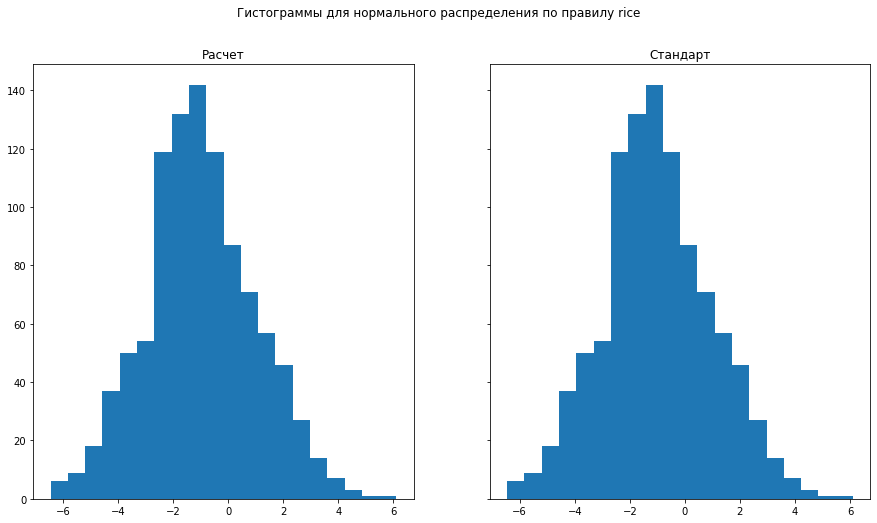

In [11]:
plotting_two_hist_sqrt(a,'нормального', 'rice')

**Вывод:** результаты совпадают для кол-ва столбцов, построенных расчетными методами и для определенных аналогичными встроенными методами